In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

In [2]:
path = "C:/Users/ss230/Documents/Python/Superconductors/superconductivty+data/train.csv"
df = pd.read_csv(path)
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
X = df.iloc[:, :-1]
y = df['critical_temp']

In [4]:
mutual_info = mutual_info_regression(X, y)

In [5]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns

In [6]:
mutual_info.sort_values(ascending=False)[:8]

std_fie                     0.958291
gmean_Density               0.948218
std_ThermalConductivity     0.939606
entropy_atomic_mass         0.934871
entropy_atomic_radius       0.929488
entropy_Density             0.916335
range_ElectronAffinity      0.914259
entropy_ElectronAffinity    0.911566
dtype: float64

In [7]:
top_features = SelectKBest(mutual_info_regression, k=8)

top_features.fit(X,y)

SelectKBest(k=8,
            score_func=<function mutual_info_regression at 0x00000229536B8D30>)

In [8]:
top_features.get_feature_names_out()

array(['entropy_atomic_mass', 'range_fie', 'std_fie',
       'entropy_atomic_radius', 'gmean_Density', 'entropy_Density',
       'range_ElectronAffinity', 'std_ThermalConductivity'], dtype=object)

C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


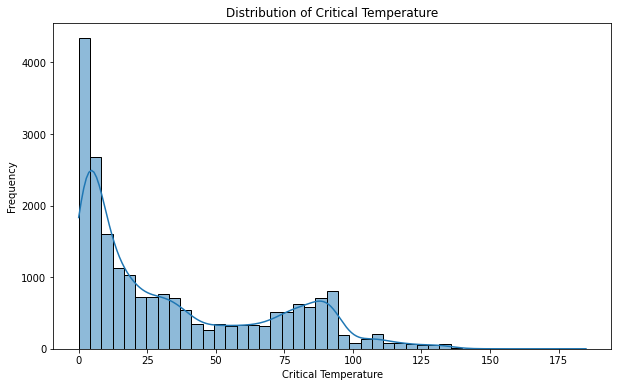

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.show()

In [10]:
y_transformed, lambda_value = boxcox(y.values.flatten())
lambda_value

0.24233279634159957

C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


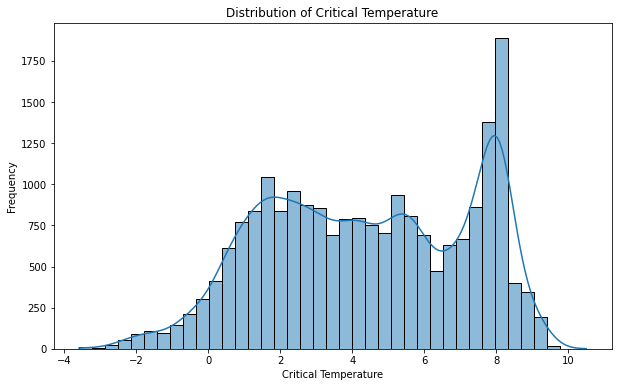

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(y_transformed, kde=True)
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.show()

In [12]:
X = df[['entropy_atomic_mass', 'range_fie', 'std_fie',
       'entropy_atomic_radius', 'gmean_Density', 'entropy_Density',
       'entropy_ElectronAffinity', 'std_ThermalConductivity']]
X

,entropy_atomic_mass,range_fie,std_fie,entropy_atomic_radius,gmean_Density,entropy_Density,entropy_ElectronAffinity,std_ThermalConductivity
0,1.181795,810.6,323.811808,1.259244,724.953211,1.033129,1.159687,168.854244
1,1.449309,810.6,290.183029,1.508328,1237.095080,1.314442,1.427997,198.554600
2,1.181795,810.6,323.811808,1.259244,724.953211,1.033129,1.159687,168.854244
3,1.181795,810.6,323.811808,1.259244,724.953211,1.033129,1.159687,168.854244
4,1.181795,810.6,323.811808,1.259244,724.953211,1.033129,1.159687,168.854244
...,...,...,...,...,...,...,...,...
21258,1.177145,273.0,114.383355,1.350879,6404.741690,1.284617,1.164382,55.056789
21259,1.323287,810.6,293.286136,1.507321,962.364248,1.165065,1.112639,151.164639
21260,0.690847,139.9,69.950000,0.690022,10150.719679,0.679023,0.667182,8.500000
21261,0.690847,139.9,69.950000,0.690022,10150.719679,0.679023,0.667182,8.500000


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((17010, 8), (4253, 8))

In [16]:
y_train.shape, y_test.shape

((17010,), (4253,))

In [17]:
parameters = {
    "objective": "reg:squarederror",
    "tree_method": "exact",
    "grow_policy": "lossguide",
    "max_depth": 6,
    "reg_alpha": 4,
    "learning_rate": 0.1,   
    "eval_metric": "rmse",
    "seed": 42
}

In [18]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [19]:
XGB_r = xgb.train(params=parameters, dtrain=train_dmatrix, num_boost_round=1000)

In [20]:
prediction = XGB_r.predict(test_dmatrix)

In [21]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print(mse)
print(r2)

0.9676753299060156
0.8780772612274059


In [22]:
prediction = inv_boxcox(prediction, lambda_value)
y_test = inv_boxcox(y_test, lambda_value)

In [23]:
Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': prediction.flatten()})
Prediction

,Actual,Predicted
0,6.40,7.362355
1,91.20,71.976669
2,38.00,68.591003
3,19.00,27.382153
4,11.00,10.315970
...,...,...
4248,83.60,79.730988
4249,83.50,89.973938
4250,3.50,4.329484
4251,8.70,8.791488


C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


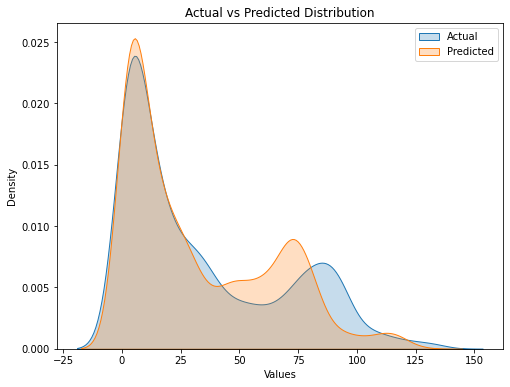

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual', fill=1)
sns.kdeplot(prediction.flatten(), label='Predicted', fill=1)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()

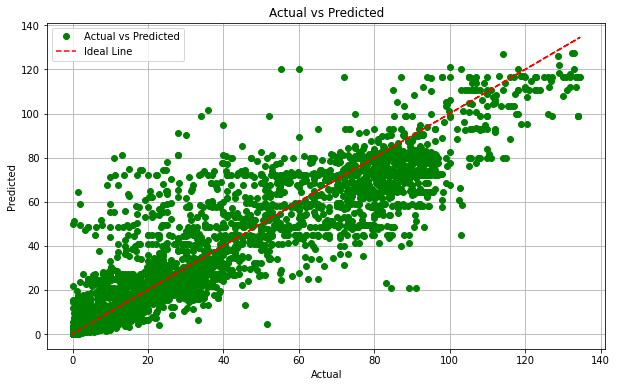

In [27]:
plt.figure(figsize=(10, 6)) 
plt.plot(Prediction['Actual'], Prediction['Predicted'], marker='o', linestyle='', color='green', label='Actual vs Predicted')
plt.plot(Prediction['Actual'], Prediction['Actual'], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual') 
plt.ylabel('Predicted')  
plt.title('Actual vs Predicted')  
plt.legend()  
plt.grid(True) 
plt.show()  